In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '953cf27b-79db-4d43-9883-939fafe349ba',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-11-13T05:33:13.399Z', 'error_code': 0, 'error_message': None, 'elapsed': 11, 'credit_count': 1, 'notice': None, 'total_count': 9977}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11798, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [2]:
import pandas as pd

In [3]:
pd.set_option("display.max.columns",37)
pd.set_option("display.max_rows", 12)
df=pd.json_normalize(data["data"])
df['timestamp']=pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11798,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.978150e+07,1.978150e+07,False,NaN,1,NaN,NaN,None,2024-11-13T05:31:00.000Z,87457.668602,1.222578e+11,-8.6209,0.243396,-1.264198,17.554522,36.907570,45.456184,49.485916,1.730044e+12,59.7996,1.836611e+12,None,2024-11-13T05:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-13 06:33:10.362694
1,1027,Ethereum,ETH,ethereum,9542,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204233e+08,1.204233e+08,True,NaN,2,NaN,NaN,None,2024-11-13T05:31:00.000Z,3184.573743,5.461281e+10,-8.8796,-0.737911,-4.841251,23.085143,25.979355,31.526340,20.080433,3.834969e+11,13.2557,3.834969e+11,None,2024-11-13T05:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-13 06:33:10.362694
2,825,Tether USDt,USDT,tether,103179,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.252382e+11,1.268354e+11,True,NaN,3,NaN,NaN,None,2024-11-13T05:31:00.000Z,1.001331,2.522518e+11,4.1849,-0.002179,0.052704,0.107779,0.197916,0.088566,0.117366,1.254049e+11,4.3347,1.270042e+11,None,2024-11-13T05:31:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-11-13 06:33:10.362694
3,5426,Solana,SOL,solana,787,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.719058e+08,5.882032e+08,True,NaN,4,NaN,NaN,None,2024-11-13T05:31:00.000Z,206.482477,1.113767e+10,2.6628,1.580424,-5.769804,11.651164,36.551770,48.799515,43.174047,9.744027e+10,3.3673,1.214536e+11,None,2024-11-13T05:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-13 06:33:10.362694
4,1839,BNB,BNB,bnb,2278,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.440992e+08,1.440992e+08,False,NaN,5,NaN,NaN,None,2024-11-13T05:31:00.000Z,608.964624,3.297988e+09,-12.9088,0.242953,-7.042228,5.121236,5.280377,9.992782,16.746967,8.775130e+10,3.0324,8.775130e+10,None,2024-11-13T05:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-13 06:33:10.362694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,5994,Shiba Inu,SHIB,shiba-inu,902,2020-08-01T00:00:00.000Z,"[memes, ethereum-ecosystem, doggone-doggerel]",NaN,5.892606e+14,5.895125e+14,False,NaN,11,NaN,NaN,None,2024-11-13T05:31:00.000Z,0.000024,4.742025e+09,-6.8896,0.168821,-18.867681,28.008879,36.744176,75.153037,79.181427,1.437758e+10,0.4970,1.438372e+10,None,2024-11-13T05:31:00.000Z,1027.0,Ethereum,ETH,ethereum,0x95ad61b0a150d79219dcf64e1e6cc01f0b64c4ce,2024-11-13 06:33:10.362694
11,11419,Toncoin,TON,toncoin,610,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.545511e+09,5.115121e+09,True,NaN,12,3.414167e+09,1.801431e+10,None,2024-11-13T05:31:00.000Z,5.276342,7.653520e+08,36.6464,-0.350364,-3.942185,10.635379,0.483919,-8.818410,-21.230852,1.343099e+10,0.4642,2.698913e+10,None,2024-11-13T05:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-13 06:33:10.362694
12,5805,Avalanche,AVAX,avalanche,801,2020-07-13T00:00:00.000Z,"[defi, smart-contracts, three-arrows-capital-p...",7.157487e+08,4.073308e+08,4.473339e+08,False,NaN,13,NaN,NaN,None,2024-11-13T05:31:00.000Z,32.329367,1.727608e+09,11.9866,-0.474791,-8.180555,23.766634,10.009285,29.411151,55.196847,1.316875e+10,0.4551,2.313970e+10,None,2024

In [4]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '953cf27b-79db-4d43-9883-939fafe349ba',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      # print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
       print(e)
    pd.set_option("display.max.columns",37)
    pd.set_option("display.max_rows", 15)
    df2=pd.json_normalize(data["data"])
    df2['timestamp']=pd.to_datetime('now')
    df=pd.concat([df,df2])
    if not os.path.isfile(r'C:\Users\alaak\OneDrive\Bureau\jupyter\APIS\API.csv'):
        df.to_csv(r'C:\Users\alaak\OneDrive\Bureau\jupyter\APIS\API.csv', header=True)
    else:
        df.to_csv(r'C:\Users\alaak\OneDrive\Bureau\jupyter\APIS\API.csv', mode='a', header =False)
        

In [5]:
import os 
from time import time 
from time import sleep
for i in range(333):
    api_runner()
    print('API runner completed successfully')
    sleep(60) #sleep for one minute
exit()

API runner completed successfully
API runner completed successfully
API runner completed successfully
API runner completed successfully
API runner completed successfully


KeyboardInterrupt: 

In [6]:
df3=pd.read_csv(r"C:\Users\alaak\OneDrive\Bureau\jupyter\APIS\API.csv")
df3


,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,...,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11798,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.978072e+07,1.978072e+07,False,NaN,1,NaN,NaN,NaN,2024-11-11T10:32:00.000Z,...,64.5774,0.734625,3.289351,19.337086,30.396175,41.305058,39.653069,1.622359e+12,58.1646,1.722360e+12,NaN,2024-11-11T10:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-11 11:34:10.468619
1,1,1027,Ethereum,ETH,ethereum,9518,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.204238e+08,1.204238e+08,True,NaN,2,NaN,NaN,NaN,2024-11-11T10:32:00.000Z,...,36.2918,1.021455,0.139698,29.484096,30.266687,35.813744,21.600860,3.845408e+11,13.7865,3.845408e+11,NaN,2024-11-11T10:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-11 11:34:10.468619
2,2,825,Tether USDt,USDT,tether,102947,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.233864e+11,1.248354e+11,True,NaN,3,NaN,NaN,NaN,2024-11-11T10:32:00.000Z,...,78.3307,-0.021094,0.028958,0.163796,0.095667,0.078875,0.001986,1.234700e+11,4.4266,1.249200e+11,NaN,2024-11-11T10:32:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-11-11 11:34:10.468619
3,3,5426,Solana,SOL,solana,785,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.719374e+08,5.882276e+08,True,NaN,4,NaN,NaN,NaN,2024-11-11T10:32:00.000Z,...,84.6617,1.703122,4.419985,31.072160,46.542563,59.069445,48.032763,1.010121e+11,3.6215,1.259026e+11,NaN,2024-11-11T10:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-11 11:34:10.468619
4,4,1839,BNB,BNB,bnb,2275,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.440993e+08,1.440993e+08,False,NaN,5,NaN,NaN,NaN,2024-11-11T10:32:00.000Z,...,25.3251,0.834987,-1.188790,11.722541,8.510380,14.895171,19.864523,9.026611e+10,3.2381,9.026611e+10,NaN,2024-11-11T10:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-11 11:34:10.468619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,10,5994,Shiba Inu,SHIB,shiba-inu,902,2020-08-01T00:00:00.000Z,"['memes', 'ethereum-ecosystem', 'doggone-dogge...",NaN,5.892606e+14,5.895125e+14,False,NaN,11,NaN,NaN,NaN,2024-11-13T05:35:00.000Z,...,-8.4058,0.219622,-17.380812,27.315830,36.419012,74.629875,78.309481,1.432851e+10,0.4953,1.433464e+10,NaN,2024-11-13T05:35:00.000Z,1027.0,Ethereum,ETH,ethereum,0x95ad61b0a150d79219dcf64e1e6cc01f0b64c4ce,2024-11-13 06:37:14.229546
851,11,11419,Toncoin,TON,toncoin,610,2021-08-26T13:40:22.000Z,"['pos', 'layer-1', 'ftx-bankruptcy-estate', 'd...",NaN,2.545511e+09,5.115121e+09,True,NaN,12,3.414167e+09,1.799338e+10,NaN,2024-11-13T05:35:00.000Z,...,36.2688,-0.252431,-3.971362,10.393608,0.362071,-8.863571,-21.386151,1.341538e+10,0.4637,2.695777e+10,NaN,2024-11-13T05:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-13 06:37:14.229546
852,12,5805,Avalanche,AVAX,avalanche,801,2020-07-13T00:00:00.000Z,"['defi', 'smart-contracts', 'three-arrows-capi...",7.157487e+08,4.073308e+08,4.473339e+08,False,NaN,13,NaN,NaN,NaN,2024-11-13T05:35:00.000Z,...,12.1215,-0.532052,-8.095292,23.353710,9.846521,29.247885,54.558517,1.313954e+10,0.4540,2.308837e+10,NaN,2024-11-13T05:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-13 06:37:14.229546
853,13,20947,Sui,SUI,sui,409,2022-07-12T08:03:11.000Z,"['binance-launchpool', 'coinbase-ventures-port.

In [7]:
pd.set_option('display.float.format',lambda x: '%.5f' %x)

In [8]:
df3

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,...,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11798,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19780725.00000,19780725.00000,False,NaN,1,NaN,NaN,NaN,2024-11-11T10:32:00.000Z,...,64.57740,0.73463,3.28935,19.33709,30.39618,41.30506,39.65307,1622358546410.52588,58.16460,1722359998160.88989,NaN,2024-11-11T10:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-11 11:34:10.468619
1,1,1027,Ethereum,ETH,ethereum,9518,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120423803.88992,120423803.88992,True,NaN,2,NaN,NaN,NaN,2024-11-11T10:32:00.000Z,...,36.29180,1.02146,0.13970,29.48410,30.26669,35.81374,21.60086,384540759787.02942,13.78650,384540759787.03003,NaN,2024-11-11T10:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-11 11:34:10.468619
2,2,825,Tether USDt,USDT,tether,102947,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,123386401199.98550,124835400522.33640,True,NaN,3,NaN,NaN,NaN,2024-11-11T10:32:00.000Z,...,78.33070,-0.02109,0.02896,0.16380,0.09567,0.07888,0.00199,123470013752.90056,4.42660,124919994986.80000,NaN,2024-11-11T10:32:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-11-11 11:34:10.468619
3,3,5426,Solana,SOL,solana,785,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,471937372.03149,588227563.88656,True,NaN,4,NaN,NaN,NaN,2024-11-11T10:32:00.000Z,...,84.66170,1.70312,4.41999,31.07216,46.54256,59.06944,48.03276,101012134160.23431,3.62150,125902556401.25999,NaN,2024-11-11T10:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-11 11:34:10.468619
4,4,1839,BNB,BNB,bnb,2275,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,144099334.29648,144099334.29648,False,NaN,5,NaN,NaN,NaN,2024-11-11T10:32:00.000Z,...,25.32510,0.83499,-1.18879,11.72254,8.51038,14.89517,19.86452,90266105335.24214,3.23810,90266105335.24001,NaN,2024-11-11T10:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-11 11:34:10.468619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,10,5994,Shiba Inu,SHIB,shiba-inu,902,2020-08-01T00:00:00.000Z,"['memes', 'ethereum-ecosystem', 'doggone-dogge...",NaN,589260551567580.62500,589512470532371.75000,False,NaN,11,NaN,NaN,NaN,2024-11-13T05:35:00.000Z,...,-8.40580,0.21962,-17.38081,27.31583,36.41901,74.62987,78.30948,14328511966.46350,0.49530,14334637650.41000,NaN,2024-11-13T05:35:00.000Z,1027.00000,Ethereum,ETH,ethereum,0x95ad61b0a150d79219dcf64e1e6cc01f0b64c4ce,2024-11-13 06:37:14.229546
851,11,11419,Toncoin,TON,toncoin,610,2021-08-26T13:40:22.000Z,"['pos', 'layer-1', 'ftx-bankruptcy-estate', 'd...",NaN,2545511408.26081,5115121484.84099,True,NaN,12,3414166606.00000,17993379392.00978,NaN,2024-11-13T05:35:00.000Z,...,36.26880,-0.25243,-3.97136,10.39361,0.36207,-8.86357,-21.38615,13415382961.98946,0.46370,26957770997.82000,NaN,2024-11-13T05:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-13 06:37:14.229546
852,12,5805,Avalanche,AVAX,avalanche,801,2020-07-13T00:00:00.000Z,"['defi', 'smart-contracts', 'three-arrows-capi...",715748719.00000,407330843.89988,447333943.89988,False,NaN,13,NaN,NaN,NaN,2024-11-13T05:35:00.000Z,...,12.12150,-0.53205,-8.09529,23.35371,9.84652,29.24789,54.55852,13139535612.90474,0.45400,23088371342.44000,NaN,2024-11-13T05:35:00.000Z,NaN

In [9]:
df4=df3.groupby('name',sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d',]].mean()

In [10]:
df5=df4.stack()
pd.set_option('display.max.rows',None)
print(df5)

name                                     
Bitcoin      quote.USD.percent_change_1h      0.39118
             quote.USD.percent_change_24h     1.59648
             quote.USD.percent_change_7d     18.64025
             quote.USD.percent_change_30d    32.61465
             quote.USD.percent_change_60d    42.79308
Ethereum     quote.USD.percent_change_1h      0.17575
             quote.USD.percent_change_24h    -1.74014
             quote.USD.percent_change_7d     27.19494
             quote.USD.percent_change_30d    28.69259
             quote.USD.percent_change_60d    34.32639
Tether USDt  quote.USD.percent_change_1h     -0.00481
             quote.USD.percent_change_24h     0.03360
             quote.USD.percent_change_7d      0.13774
             quote.USD.percent_change_30d     0.13940
             quote.USD.percent_change_60d     0.07749
Solana       quote.USD.percent_change_1h      1.87744
             quote.USD.percent_change_24h     1.09643
             quote.USD.percent_change_7d

In [11]:
df6=df5.to_frame(name='values')

In [12]:
# index=pd.Index(range(75))
# df6
df6.reset_index(inplace=True)
df6.rename(columns={'level_1':'percent change'},inplace=True)
df6

,name,percent change,values
0,Bitcoin,quote.USD.percent_change_1h,0.39118
1,Bitcoin,quote.USD.percent_change_24h,1.59648
2,Bitcoin,quote.USD.percent_change_7d,18.64025
3,Bitcoin,quote.USD.percent_change_30d,32.61465
4,Bitcoin,quote.USD.percent_change_60d,42.79308
5,Ethereum,quote.USD.percent_change_1h,0.17575
6,Ethereum,quote.USD.percent_change_24h,-1.74014
7,Ethereum,quote.USD.percent_change_7d,27.19494
8,Ethereum,quote.USD.percent_change_30d,28.69259
9,Ethereum,quote.USD.percent_change_60d,34.32639


In [13]:
df6['percent change'] = df6['percent change'].str.replace('quote.USD.percent_change_', '', regex=False)
df6[df6['values']<0]

,name,percent change,values
6,Ethereum,24h,-1.74014
10,Tether USDt,1h,-0.00481
21,BNB,24h,-3.29824
30,USDC,1h,-0.00229
32,USDC,7d,-0.01416
34,USDC,60d,-0.00465
41,Cardano,24h,-3.04587
50,TRON,1h,-0.25901
56,Toncoin,24h,-3.53261
59,Toncoin,60d,-4.18966


In [14]:
df6['values'] = pd.to_numeric(df6['values'], errors='coerce')


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

<Figure size 15000x3500 with 0 Axes>

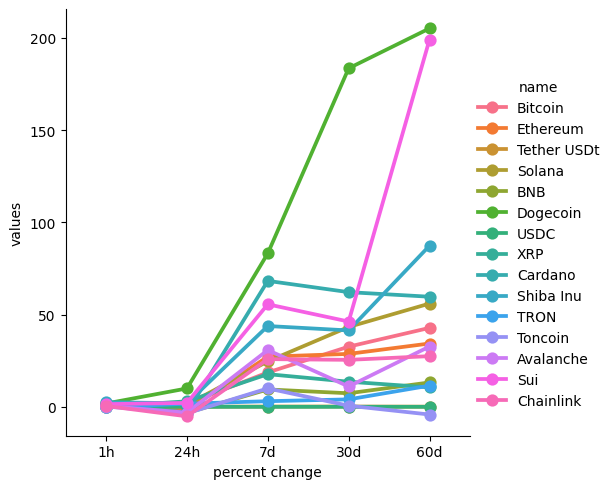

In [16]:
plt.figure(figsize=(150, 35))
sns.catplot(x='percent change', y='values', hue='name', data=df6, kind='point')
plt.show()

In [17]:
pd.set_option('display.max.columns',38)
df3.head(5)
df7=df3[['name','quote.USD.price','timestamp']]
df_bitcoin=df7[df7['name']=='Bitcoin']
df_bitcoin=df_bitcoin.drop_duplicates(subset='quote.USD.price')
df_bitcoin['timestamp'] = pd.to_datetime(df_bitcoin['timestamp'])
df_bitcoin['timestamp']=df_bitcoin['timestamp'].dt.strftime('%H:%M')

(81968.62721988272, 87458.66860202642)

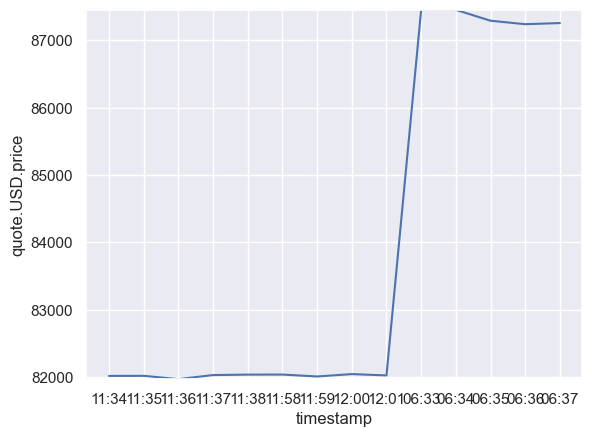

In [18]:
sns.set_theme(style='darkgrid')
sns.lineplot(x='timestamp',y='quote.USD.price',data=df_bitcoin)
plt.ylim(df_bitcoin['quote.USD.price'].min() - 1, df_bitcoin['quote.USD.price'].max() + 1)